In [1]:
from progpy.models import BatteryElectroChemEODEOL
from progpy.models import NEW_BatteryElectroChemEODEOL

batt = BatteryElectroChemEODEOL()
batt2 = NEW_BatteryElectroChemEODEOL()

print('inputs:', batt.inputs)
print('outputs:', batt.outputs)
print('event(s): ', batt.events)
print('states:', batt.states)
print('params:', batt.parameters)

print('\n\ninputs:', batt2.inputs)
print('outputs:', batt2.outputs)
print('event(s): ', batt2.events)
print('states:', batt2.states)
print('params:', batt2.parameters)

inputs: ['i']
outputs: ['t', 'v']
event(s):  ['EOD', 'InsufficientCapacity']
states: ['tb', 'Vo', 'Vsn', 'Vsp', 'qnB', 'qnS', 'qpB', 'qpS', 'qMax', 'Ro', 'D']
params: {'process_noise': {'tb': np.float64(0.0), 'Vo': np.float64(0.0), 'Vsn': np.float64(0.0), 'Vsp': np.float64(0.0), 'qnB': np.float64(0.0), 'qnS': np.float64(0.0), 'qpB': np.float64(0.0), 'qpS': np.float64(0.0), 'qMax': np.float64(0.0), 'Ro': np.float64(0.0), 'D': np.float64(0.0)}, 'measurement_noise': {'t': np.float64(0.0), 'v': np.float64(0.0)}, 'qMobile': 7600, 'xnMax': 0.6, 'xnMin': 0.0, 'xpMax': 1.0, 'xpMin': 0.4, 'Ro': 0.117215, 'alpha': 0.5, 'Sn': 0.000437545, 'Sp': 0.00030962, 'kn': 2120.96, 'kp': 248898, 'Vol': 2e-05, 'VolSFraction': 0.1, 'tDiffusion': 7000000.0, 'to': 6.08671, 'tsn': 1001.38, 'tsp': 46.4311, 'U0p': 4.03, 'Ap': [-31593.7, 0.106747, 24606.4, -78561.9, 13317.9, 307387, 84916.1, -1074690.0, 2285.04, 990894, 283920, -161513, -469218], 'U0n': 0.01, 'An': [86.19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'x0':

/Users/mly1/Documents/progpy/src/progpy/models/battery_electrochem.py:676: UserWarning: Ro, qMobile, and tDiffusion will be overwritten within the model as part of battery aging modeling. Use BatteryElectroChemEOD to remove this behavior.
  warnings.warn("Ro, qMobile, and tDiffusion will be overwritten within the model as part of battery aging modeling. Use BatteryElectroChemEOD to remove this behavior.")


In [2]:
config = {
    'save_freq': 1000,
    'dt': 2,
    'events': 'EOD',
    'print': True
}

def future_loading(t, x=None):
    # Variable (piece-wise) future loading scheme 
    if (t < 600):
        i = 2
    elif (t < 900):
        i = 1
    elif (t < 1800):
        i = 4
    elif (t < 3000):
        i = 2     
    else:
        i = 3
    return batt.InputContainer({'i': i})

def future_loading2(t, x=None):
    # Variable (piece-wise) future loading scheme 
    if (t < 600):
        i = 2
    elif (t < 900):
        i = 1
    elif (t < 1800):
        i = 4
    elif (t < 3000):
        i = 2     
    else:
        i = 3
    return batt2.InputContainer({'i': i})

In [3]:
simulated_results = batt.simulate_to_threshold(future_loading, **config)

Time: 0.0
	Input: {'i': np.float64(2.0)}
	State: {'tb': np.float64(292.1), 'Vo': np.float64(0.0), 'Vsn': np.float64(0.0), 'Vsp': np.float64(0.0), 'qnB': np.float64(6840.0), 'qnS': np.float64(760.0), 'qpB': np.float64(4560.000000000001), 'qpS': np.float64(506.6666666666668), 'qMax': np.float64(7600.0), 'Ro': np.float64(0.117215), 'D': np.float64(7000000.0)}
	Output: {'t': np.float64(18.950000000000045), 'v': np.float64(4.191350293826752)}
	Event State: {'EOD': np.float64(1.0), 'InsufficientCapacity': np.float64(1.0)}

Time: 1000.0
	Input: {'i': np.float64(4.0)}
	State: {'tb': np.float64(295.7479196540662), 'Vo': np.float64(0.4763626118437062), 'Vsn': np.float64(0.04471318982334421), 'Vsp': np.float64(0.002444796213442337), 'qnB': np.float64(5175.3541148800105), 'qnS': np.float64(524.6458851199766), 'qpB': np.float64(6224.64588511999), 'qpS': np.float64(742.0207815466904), 'qMax': np.float64(7580.999999999949), 'Ro': np.float64(0.1191150000000012), 'D': np.float64(7000018.999999948)}
	Ou

In [4]:
simulated_results2 = batt2.simulate_to_threshold(future_loading, **config)

Time: 0.0
	Input: {'i': np.float64(2.0)}
	State: {'tb': np.float64(292.1), 'Vo': np.float64(0.0), 'Vsn': np.float64(0.0), 'Vsp': np.float64(0.0), 'qnB': np.float64(6840.0), 'qnS': np.float64(760.0), 'qpB': np.float64(4560.000000000001), 'qpS': np.float64(506.6666666666668), 'qMobile': np.float64(7600.0), 'tDiffusion': np.float64(7000000.0), 'Ro': np.float64(0.117215), 'Ro2': np.float64(0.117215), 'qMax': np.float64(7600.0), 'D': np.float64(7000000.0)}
	Output: {'t': np.float64(18.950000000000045), 'v': np.float64(4.191350293826752)}
	Event State: {'EOD': np.float64(1.0), 'InsufficientCapacity': np.float64(1.0)}

Time: 1000.0
	Input: {'i': np.float64(4.0)}
	State: {'tb': np.float64(295.7479196540662), 'Vo': np.float64(0.4763626118437062), 'Vsn': np.float64(0.04471318982334421), 'Vsp': np.float64(0.002444796213442337), 'qnB': np.float64(5175.3541148800105), 'qnS': np.float64(524.6458851199766), 'qpB': np.float64(6224.64588511999), 'qpS': np.float64(742.0207815466904), 'qMobile': np.float

/Users/mly1/Documents/progpy/src/progpy/exceptions.py:20: UserWarning: Behavior of SimResult.plot() will change with version 1.6. New behavior will match that of a pandas data frame.
  warn(msg, *args, **kwargs)


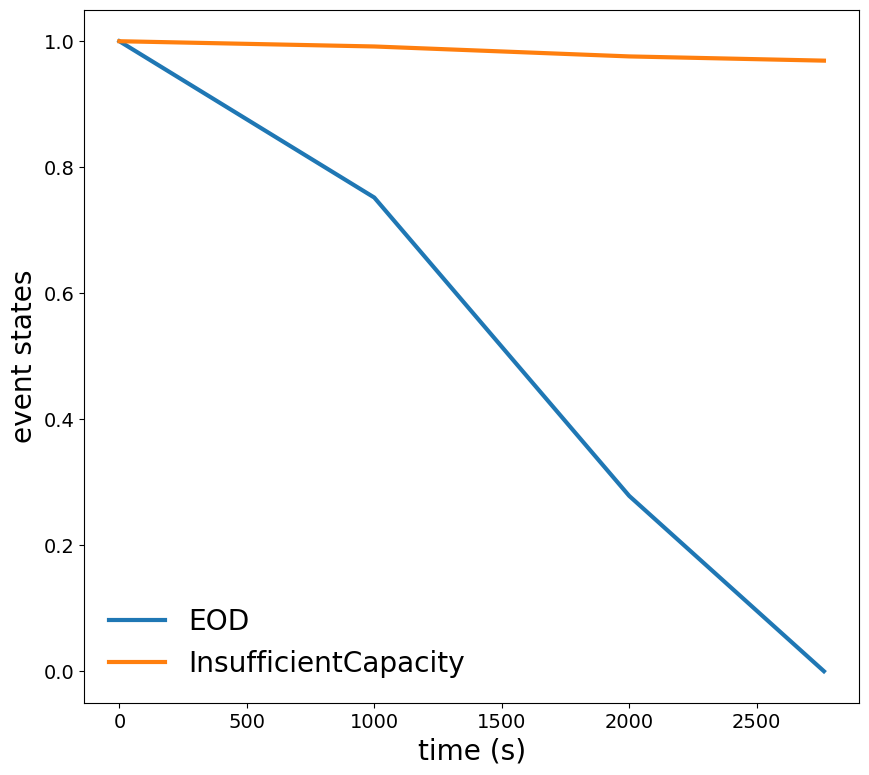

In [5]:
fig = simulated_results.event_states.plot(xlabel='time (s)', ylabel='event states', labels={'EOD', 'InsufficientCapacity'})

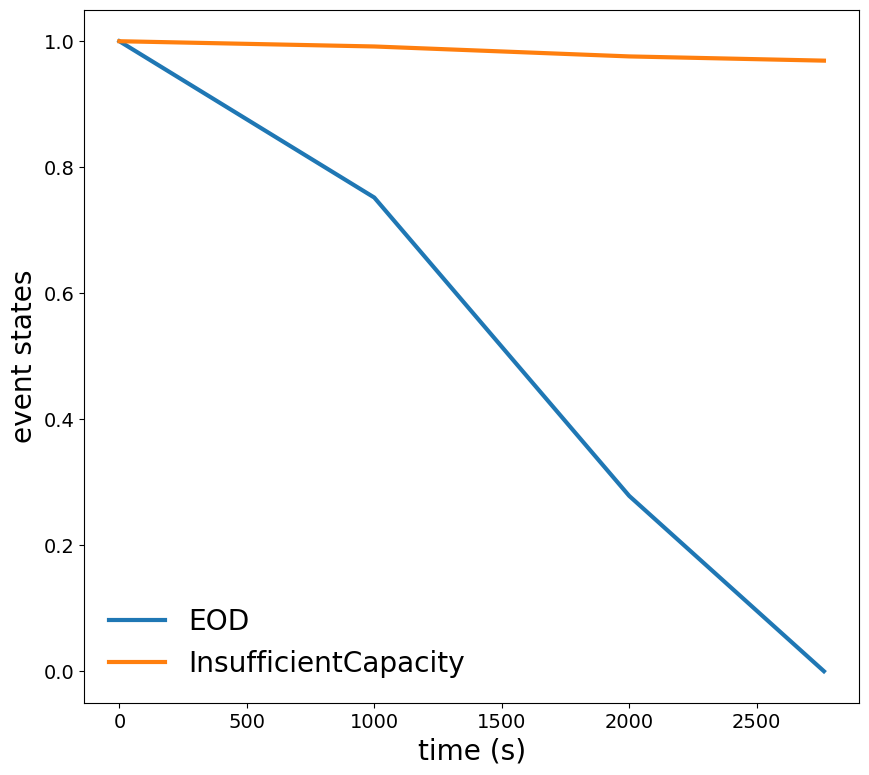

In [6]:
fig = simulated_results2.event_states.plot(xlabel='time (s)', ylabel='event states', labels={'EOD', 'InsufficientCapacity'})